# MNIST 성능향상 과제 

### 컴퓨터과학부 2014920044 이홍석

### 기본 예제 코드

1. 모듈 import

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

np.random.seed(2014920044)
tf.set_random_seed(2014920044)

2. MNIST 다운로드

In [3]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


3. 첫번째 Convolution, Pooling Layer

In [0]:
num_filters1 = 32

x = tf.placeholder(tf.float64, [None, 784])
x_image = tf.reshape(x, [-1,28,28,1])

W_conv1 = tf.Variable(tf.truncated_normal([5,5,1,num_filters1],
                                          stddev=0.1, dtype=tf.float64))
h_conv1 = tf.nn.conv2d(x_image, W_conv1,
                       strides=[1,1,1,1], padding='SAME')

b_conv1 = tf.Variable(tf.constant(0.1, shape=[num_filters1], dtype=tf.float64))
h_conv1_cutoff = tf.nn.relu(h_conv1 + b_conv1)

h_pool1 = tf.nn.max_pool(h_conv1_cutoff, ksize=[1,2,2,1],
                         strides=[1,2,2,1], padding='SAME')

4. 두번째 Convolution, Pooling Layer

In [0]:
num_filters2 = 64

W_conv2 = tf.Variable(
            tf.truncated_normal([5,5,num_filters1,num_filters2],
                                stddev=0.1, dtype=tf.float64))
h_conv2 = tf.nn.conv2d(h_pool1, W_conv2,
                       strides=[1,1,1,1], padding='SAME')

b_conv2 = tf.Variable(tf.constant(0.1, shape=[num_filters2], dtype=tf.float64))
h_conv2_cutoff = tf.nn.relu(h_conv2 + b_conv2)

h_pool2 = tf.nn.max_pool(h_conv2_cutoff, ksize=[1,2,2,1],
                         strides=[1,2,2,1], padding='SAME')

5. 전 결합층, Dropout, Softmax

In [0]:
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*num_filters2])

num_units1 = 7*7*num_filters2
num_units2 = 1024

w2 = tf.Variable(tf.truncated_normal([num_units1, num_units2], dtype=tf.float64))
b2 = tf.Variable(tf.constant(0.1, shape=[num_units2], dtype=tf.float64))
hidden2 = tf.nn.relu(tf.matmul(h_pool2_flat, w2) + b2)

keep_prob = tf.placeholder(tf.float64)
hidden2_drop = tf.nn.dropout(hidden2, keep_prob)

w0 = tf.Variable(tf.zeros([num_units2, 10], dtype=tf.float64))
b0 = tf.Variable(tf.zeros([10], dtype=tf.float64))
p = tf.nn.softmax(tf.matmul(hidden2_drop, w0) + b0)

6. Loss 함수 정의(Categorical Entropy), Adam, Accuracy 정의

In [0]:
t = tf.placeholder(tf.float64, [None, 10])
loss = -tf.reduce_sum(t * tf.log(p))
train_step = tf.train.AdamOptimizer(0.0005).minimize(loss)
correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float64))

7. 세션 정의, 변수 초기화, Saver사용

In [0]:
gpu_options = tf.GPUOptions(allow_growth=True)
sess = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))
sess.run(tf.global_variables_initializer())

8. Training

In [0]:
i = 0
for _ in range(20000):
    i += 1
    batch_xs, batch_ts = mnist.train.next_batch(50)
    sess.run(train_step,
             feed_dict={x:batch_xs, t:batch_ts, keep_prob:0.5})
    if i % 500 == 0:
        loss_vals, acc_vals = [], []
        for c in range(4):
            start = int(len(mnist.test.labels) / 4 * c)
            end = int(len(mnist.test.labels) / 4 * (c+1))
            loss_val, acc_val = sess.run([loss, accuracy],
                feed_dict={x:mnist.test.images[start:end],
                           t:mnist.test.labels[start:end],
                           keep_prob:1.0})
            loss_vals.append(loss_val)
            acc_vals.append(acc_val)
        loss_val = np.sum(loss_vals)
        acc_val = np.mean(acc_vals)
        print ('Step: %d, Loss: %f, Accuracy: %f'
               % (i, loss_val, acc_val))

Step: 500, Loss: 1018.830770, Accuracy: 0.968500
Step: 1000, Loss: 678.373034, Accuracy: 0.977700
Step: 1500, Loss: 578.188240, Accuracy: 0.980800
Step: 2000, Loss: 615.113616, Accuracy: 0.980000
Step: 2500, Loss: 510.048087, Accuracy: 0.983300
Step: 3000, Loss: 368.093509, Accuracy: 0.987100
Step: 3500, Loss: 353.508056, Accuracy: 0.988400
Step: 4000, Loss: 338.223525, Accuracy: 0.988800
Step: 4500, Loss: 376.829052, Accuracy: 0.987200
Step: 5000, Loss: 386.845187, Accuracy: 0.988300
Step: 5500, Loss: 381.885614, Accuracy: 0.988300
Step: 6000, Loss: 345.876228, Accuracy: 0.989600
Step: 6500, Loss: 340.118413, Accuracy: 0.989300
Step: 7000, Loss: 365.177423, Accuracy: 0.988300
Step: 7500, Loss: 358.060137, Accuracy: 0.988900
Step: 8000, Loss: 331.933786, Accuracy: 0.989400
Step: 8500, Loss: 274.256622, Accuracy: 0.991100
Step: 9000, Loss: 360.361573, Accuracy: 0.989800
Step: 9500, Loss: 321.340006, Accuracy: 0.991100
Step: 10000, Loss: 359.175938, Accuracy: 0.990100
Step: 10500, Loss: 

9. 첫번째 Layer(Cutoff 적용X)

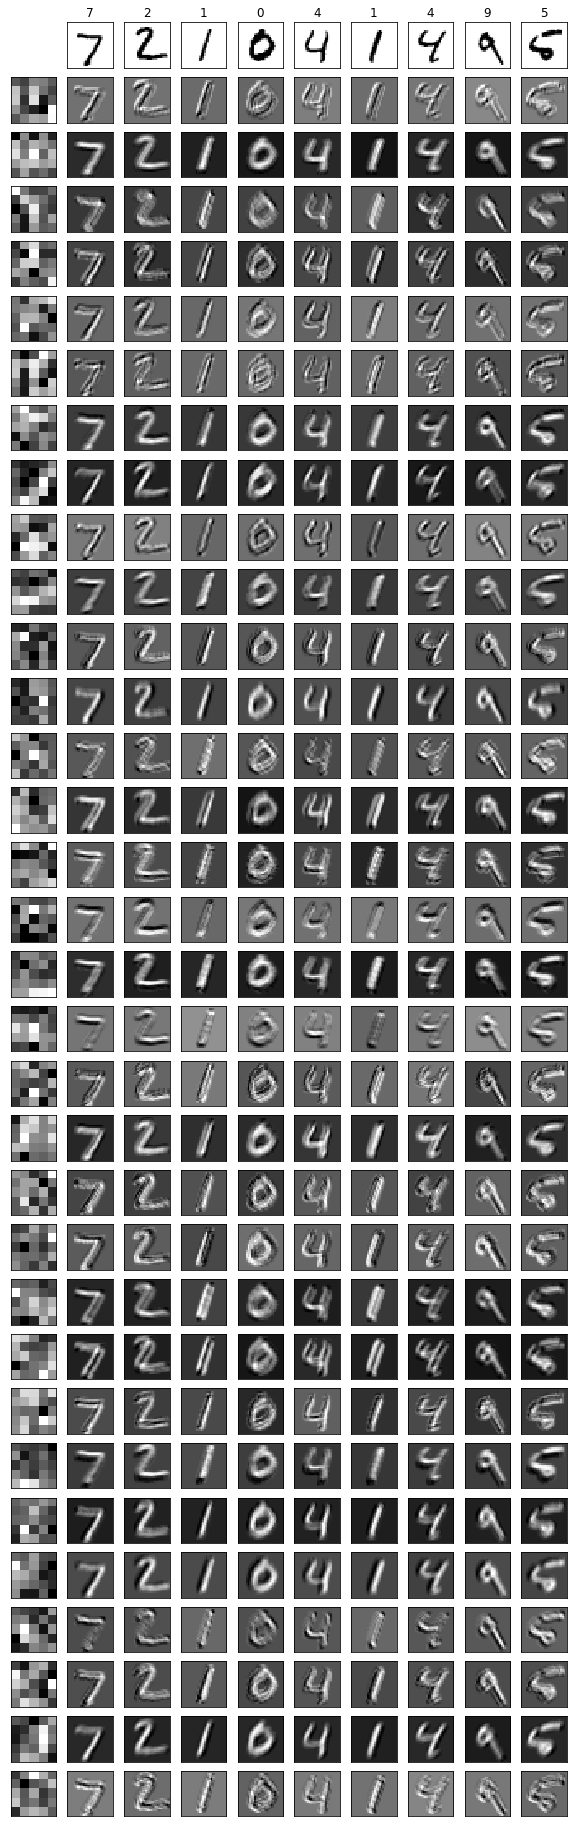

In [0]:
filter1_vals, conv1_vals, pool1_vals = sess.run(
    [W_conv1, h_conv1, h_pool1], feed_dict={x:mnist.test.images[:9]})
fig = plt.figure(figsize=(10,num_filters1+1))

for i in range(num_filters1):
    subplot = fig.add_subplot(num_filters1+1, 10, 10*(i+1)+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(filter1_vals[:,:,0,i],
                   cmap=plt.cm.gray_r, interpolation='nearest')

for i in range(9):
    subplot = fig.add_subplot(num_filters1+1, 10, i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(mnist.test.labels[i]))
    subplot.imshow(mnist.test.images[i].reshape((28,28)),
                   vmin=0, vmax=1,
                   cmap=plt.cm.gray_r, interpolation='nearest')

    for f in range(num_filters1):
        subplot = fig.add_subplot(num_filters1+1, 10, 10*(f+1)+i+2)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.imshow(conv1_vals[i,:,:,f],
                       cmap=plt.cm.gray_r, interpolation='nearest')    

10. 첫번째 Layer(Cutoff 적용O)

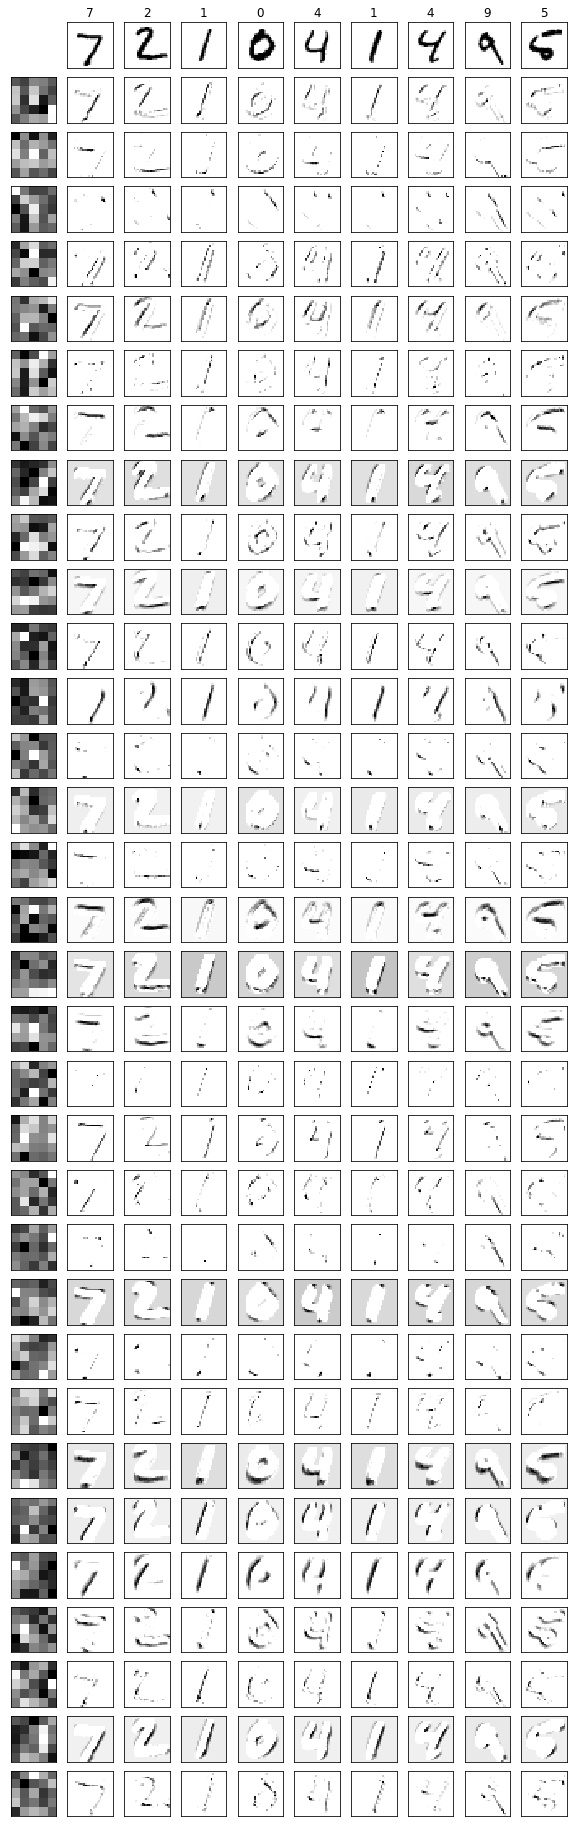

In [0]:
filter1_vals, conv1_vals, pool1_vals = sess.run(
    [W_conv1, h_conv1_cutoff, h_pool1], feed_dict={x:mnist.test.images[:9]})
fig = plt.figure(figsize=(10,num_filters1+1))

for i in range(num_filters1):
    subplot = fig.add_subplot(num_filters1+1, 10, 10*(i+1)+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(filter1_vals[:,:,0,i],
                   cmap=plt.cm.gray_r, interpolation='nearest')

for i in range(9):
    subplot = fig.add_subplot(num_filters1+1, 10, i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(mnist.test.labels[i]))
    subplot.imshow(mnist.test.images[i].reshape((28,28)),
                   vmin=0, vmax=1,
                   cmap=plt.cm.gray_r, interpolation='nearest')

    for f in range(num_filters1):
        subplot = fig.add_subplot(num_filters1+1, 10, 10*(f+1)+i+2)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.imshow(conv1_vals[i,:,:,f],
                       cmap=plt.cm.gray_r, interpolation='nearest')    

11. 두번째 Layer(Cutoff 적용 X)

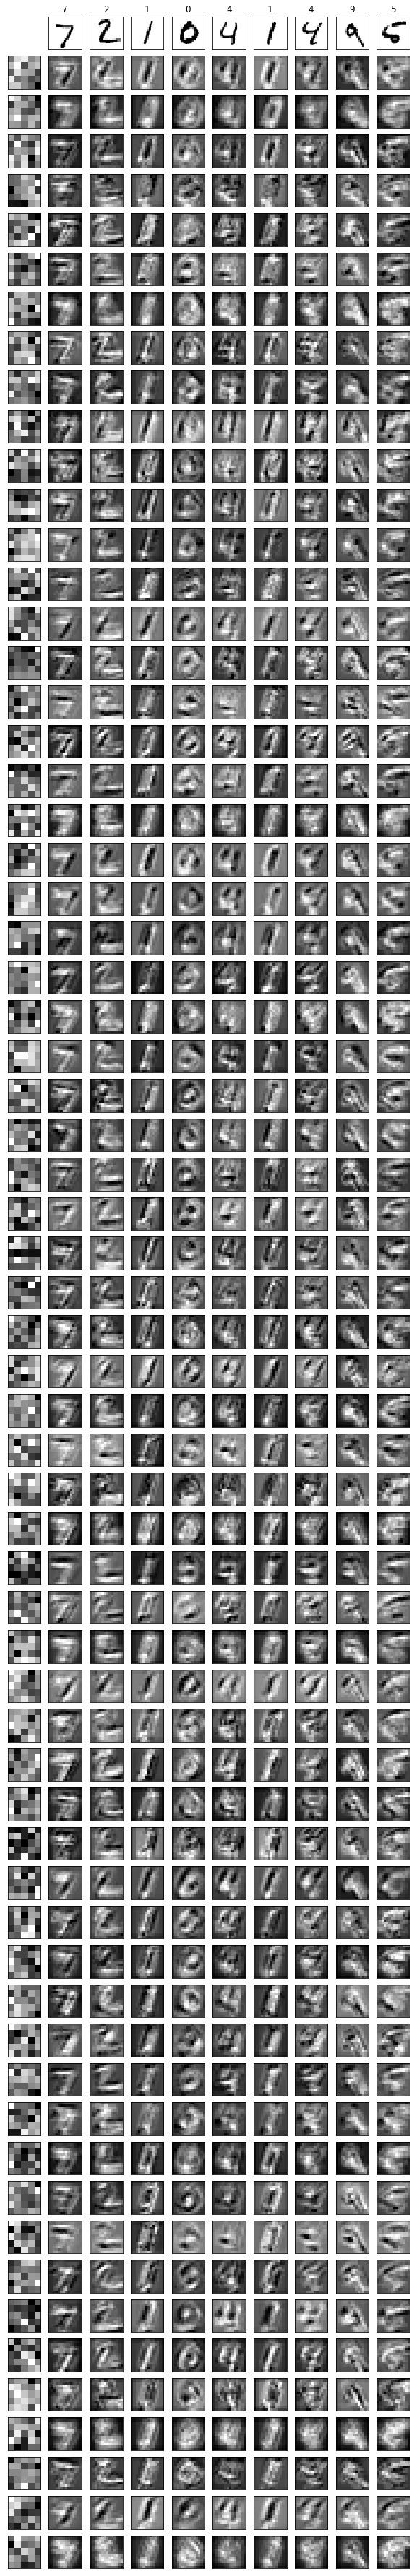

In [0]:
filter2_vals, conv2_vals, pool2_vals = sess.run(
    [W_conv2, h_conv2, h_pool2], feed_dict={x:mnist.test.images[:9]})
fig = plt.figure(figsize=(10,num_filters2+1))

for i in range(num_filters2):
    subplot = fig.add_subplot(num_filters2+1, 10, 10*(i+1)+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(filter2_vals[:,:,0,i],
                   cmap=plt.cm.gray_r, interpolation='nearest')

for i in range(9):
    subplot = fig.add_subplot(num_filters2+1, 10, i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(mnist.test.labels[i]))
    subplot.imshow(mnist.test.images[i].reshape((28,28)),
                   vmin=0, vmax=1,
                   cmap=plt.cm.gray_r, interpolation='nearest')

    for f in range(num_filters2):
        subplot = fig.add_subplot(num_filters2+1, 10, 10*(f+1)+i+2)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.imshow(conv2_vals[i,:,:,f],
                       cmap=plt.cm.gray_r, interpolation='nearest')

12. 두번재 Layer(Cutoff 적용 O)

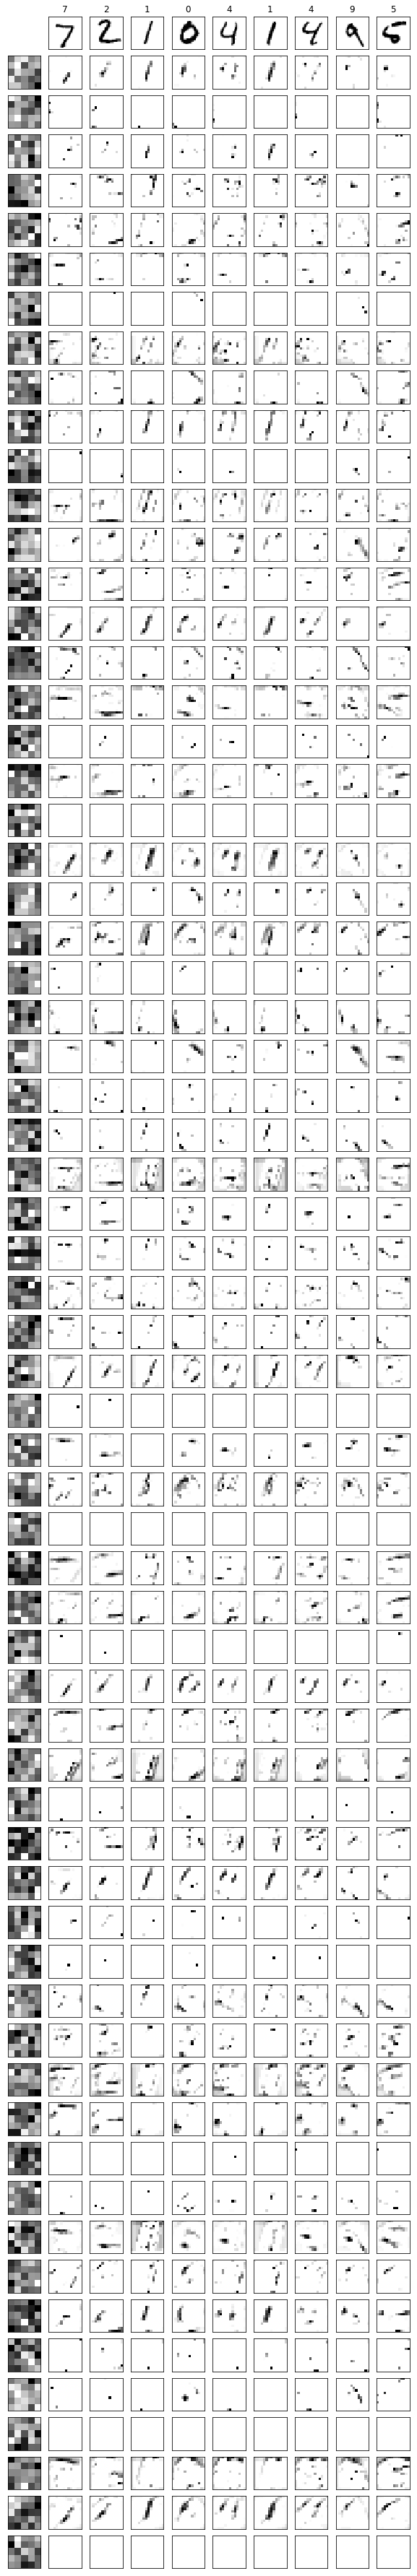

In [0]:
filter2_vals, conv2_vals, pool2_vals = sess.run(
    [W_conv2, h_conv2_cutoff, h_pool2], feed_dict={x:mnist.test.images[:9]})
fig = plt.figure(figsize=(10,num_filters2+1))

for i in range(num_filters2):
    subplot = fig.add_subplot(num_filters2+1, 10, 10*(i+1)+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(filter2_vals[:,:,0,i],
                   cmap=plt.cm.gray_r, interpolation='nearest')

for i in range(9):
    subplot = fig.add_subplot(num_filters2+1, 10, i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(mnist.test.labels[i]))
    subplot.imshow(mnist.test.images[i].reshape((28,28)),
                   vmin=0, vmax=1,
                   cmap=plt.cm.gray_r, interpolation='nearest')

    for f in range(num_filters2):
        subplot = fig.add_subplot(num_filters2+1, 10, 10*(f+1)+i+2)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.imshow(conv2_vals[i,:,:,f],
                       cmap=plt.cm.gray_r, interpolation='nearest')

### 실험 목표

교재의 기본 코드를 활용하여 Accuracy가 0.9924 정도 올라가는 것을 볼 수 있었습니다. 
다른 인자들을 조절하여 0.994이상 올리는 것을 목표로 하겠습니다.

### 실험 환경

필터출력은 문서가 매우 길어질 수 있으므로 기본코드와 결과가 가장 잘 나오는 코드만 출력하겠습니다.
사용한 툴은 tensorflow-gpu, python 3.6, jupyter notebook 이고 사용한 그래픽카드는 GTX1060 6GB 입니다.
그래픽 메모리를 초과하는 경우가 많아서 Session이 메모리를 동적할당 할 수 있도록 바꾸었습니다.
모든 변수들은 tf.float64를 적용하여 계산도중에 생길 수 있는 오버플로우를 줄였습니다.
오버플로우를 줄였기 때문에 학습률을 크게 주어도 Nan이 생기지 않았습니다.

### 실험 결과

#### 1. Hidden Layer의 수 조절

##### 1) 3개

In [4]:
num_filters1 = 32

x = tf.placeholder(tf.float64, [None, 784])
x_image = tf.reshape(x, [-1,28,28,1])

W_conv1 = tf.Variable(tf.truncated_normal([5,5,1,num_filters1],
                                          stddev=0.1, dtype = tf.float64))
h_conv1 = tf.nn.conv2d(x_image, W_conv1,
                       strides=[1,1,1,1], padding='SAME')

b_conv1 = tf.Variable(tf.constant(0.1, shape=[num_filters1], dtype = tf.float64))
h_conv1_cutoff = tf.nn.relu(h_conv1 + b_conv1)

h_pool1 = tf.nn.max_pool(h_conv1_cutoff, ksize=[1,2,2,1],
                         strides=[1,2,2,1], padding='SAME')

num_filters2 = 64

W_conv2 = tf.Variable(
            tf.truncated_normal([5,5,num_filters1,num_filters2],
                                stddev=0.1, dtype = tf.float64))
h_conv2 = tf.nn.conv2d(h_pool1, W_conv2,
                       strides=[1,1,1,1], padding='SAME')

b_conv2 = tf.Variable(tf.constant(0.1, shape=[num_filters2], dtype = tf.float64))
h_conv2_cutoff = tf.nn.relu(h_conv2 + b_conv2)

h_pool2 = tf.nn.max_pool(h_conv2_cutoff, ksize=[1,2,2,1],
                         strides=[1,2,2,1], padding='SAME')

num_filters3 = 128

W_conv3 = tf.Variable(
            tf.truncated_normal([5,5,num_filters2,num_filters3],
                                stddev=0.1, dtype=tf.float64))
h_conv3 = tf.nn.conv2d(h_pool2, W_conv3,
                       strides=[1,1,1,1], padding='SAME')

b_conv3 = tf.Variable(tf.constant(0.1, shape=[num_filters3], dtype=tf.float64))
h_conv3_cutoff = tf.nn.relu(h_conv3 + b_conv3)

h_pool3 = tf.nn.max_pool(h_conv3_cutoff, ksize=[1,2,2,1],
                         strides=[1,3,3,1], padding='SAME')

h_pool3_flat = tf.reshape(h_pool3, [-1, 3*3*num_filters3])

num_units1 = 3*3*num_filters3
num_units2 = 1024

w3 = tf.Variable(tf.truncated_normal([num_units1, num_units2], dtype = tf.float64))
b3 = tf.Variable(tf.constant(0.1, shape=[num_units2], dtype = tf.float64))
hidden3 = tf.nn.relu(tf.matmul(h_pool3_flat, w3) + b3)

keep_prob = tf.placeholder(tf.float64)
hidden3_drop = tf.nn.dropout(hidden3, keep_prob)

w0 = tf.Variable(tf.zeros([num_units2, 10], dtype = tf.float64))
b0 = tf.Variable(tf.zeros([10], dtype = tf.float64))
p = tf.nn.softmax(tf.matmul(hidden3_drop, w0) + b0)

t = tf.placeholder(tf.float64, [None, 10])
loss = -tf.reduce_sum(t * tf.log(p))
train_step = tf.train.AdamOptimizer(0.0005).minimize(loss)
correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float64))

gpu_options = tf.GPUOptions(allow_growth=True)
sess = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))
sess.run(tf.global_variables_initializer())

i = 0
for _ in range(40000):
    i += 1
    batch_xs, batch_ts = mnist.train.next_batch(50)
    sess.run(train_step,
             feed_dict={x:batch_xs, t:batch_ts, keep_prob:0.5})
    if i % 500 == 0:
        loss_vals, acc_vals = [], []
        for c in range(4):
            start = int(len(mnist.test.labels) / 4 * c)
            end = int(len(mnist.test.labels) / 4 * (c+1))
            loss_val, acc_val = sess.run([loss, accuracy],
                feed_dict={x:mnist.test.images[start:end],
                           t:mnist.test.labels[start:end],
                           keep_prob:1.0})
            loss_vals.append(loss_val)
            acc_vals.append(acc_val)
        loss_val = np.sum(loss_vals)
        acc_val = np.mean(acc_vals)
        print ('Step: %d, Loss: %f, Accuracy: %f'
               % (i, loss_val, acc_val))

Step: 500, Loss: 842.779164, Accuracy: 0.972500
Step: 1000, Loss: 723.133041, Accuracy: 0.975500
Step: 1500, Loss: 583.380487, Accuracy: 0.981600
Step: 2000, Loss: 412.809948, Accuracy: 0.986100
Step: 2500, Loss: 375.742640, Accuracy: 0.987900
Step: 3000, Loss: 345.146884, Accuracy: 0.988400
Step: 3500, Loss: 287.642720, Accuracy: 0.991200
Step: 4000, Loss: 355.800250, Accuracy: 0.989000
Step: 4500, Loss: 331.794904, Accuracy: 0.990400
Step: 5000, Loss: 416.998348, Accuracy: 0.988200
Step: 5500, Loss: 364.907781, Accuracy: 0.989300
Step: 6000, Loss: 289.272507, Accuracy: 0.990600
Step: 6500, Loss: 347.439002, Accuracy: 0.989100
Step: 7000, Loss: 346.069159, Accuracy: 0.990000
Step: 7500, Loss: 326.904634, Accuracy: 0.989600
Step: 8000, Loss: 401.998358, Accuracy: 0.988800
Step: 8500, Loss: 329.744075, Accuracy: 0.991000
Step: 9000, Loss: 320.398543, Accuracy: 0.991500
Step: 9500, Loss: 375.399032, Accuracy: 0.989100
Step: 10000, Loss: 344.567600, Accuracy: 0.991100
Step: 10500, Loss: 2

학습속도가 느려서 40000번 학습시켰습니다. 
Loss는 기존 코드보다 많이 올라갔습니다. 
Accuracy는 0.001정도 올라간 것을 알 수 있었습니다. 

##### 2) 4개

In [0]:
num_filters1 = 32

x = tf.placeholder(tf.float64, [None, 784])
x_image = tf.reshape(x, [-1,28,28,1])

W_conv1 = tf.Variable(tf.truncated_normal([5,5,1,num_filters1],
                                          stddev=0.1, dtype=tf.float64))
h_conv1 = tf.nn.conv2d(x_image, W_conv1,
                       strides=[1,1,1,1], padding='SAME')

b_conv1 = tf.Variable(tf.constant(0.1, shape=[num_filters1], dtype=tf.float64))
h_conv1_cutoff = tf.nn.relu(h_conv1 + b_conv1)

h_pool1 = tf.nn.max_pool(h_conv1_cutoff, ksize=[1,2,2,1],
                         strides=[1,2,2,1], padding='SAME')

num_filters2 = 64

W_conv2 = tf.Variable(
            tf.truncated_normal([5,5,num_filters1,num_filters2],
                                stddev=0.1, dtype=tf.float64))
h_conv2 = tf.nn.conv2d(h_pool1, W_conv2,
                       strides=[1,1,1,1], padding='SAME')

b_conv2 = tf.Variable(tf.constant(0.1, shape=[num_filters2], dtype=tf.float64))
h_conv2_cutoff = tf.nn.relu(h_conv2 + b_conv2)

h_pool2 = tf.nn.max_pool(h_conv2_cutoff, ksize=[1,2,2,1],
                         strides=[1,2,2,1], padding='SAME')

num_filters3 = 128

W_conv3 = tf.Variable(
            tf.truncated_normal([5,5,num_filters2,num_filters3],
                                stddev=0.1, dtype=tf.float64))
h_conv3 = tf.nn.conv2d(h_pool2, W_conv3,
                       strides=[1,1,1,1], padding='SAME')

b_conv3 = tf.Variable(tf.constant(0.1, shape=[num_filters3], dtype=tf.float64))
h_conv3_cutoff = tf.nn.relu(h_conv3 + b_conv3)

h_pool3 = tf.nn.max_pool(h_conv3_cutoff, ksize=[1,2,2,1],
                         strides=[1,3,3,1], padding='SAME')

num_filters4 = 256

W_conv4 = tf.Variable(
            tf.truncated_normal([5,5,num_filters3,num_filters4],
                                stddev=0.1, dtype=tf.float64))
h_conv4 = tf.nn.conv2d(h_pool3, W_conv4,
                       strides=[1,1,1,1], padding='SAME')

b_conv4 = tf.Variable(tf.constant(0.1, shape=[num_filters4], dtype=tf.float64))
h_conv4_cutoff = tf.nn.relu(h_conv4 + b_conv4)

h_pool4 = tf.nn.max_pool(h_conv4_cutoff, ksize=[1,2,2,1],
                         strides=[1,1,1,1], padding='SAME')

h_pool4_flat = tf.reshape(h_pool4, [-1, 3*3*num_filters4])

num_units1 = 3*3*num_filters4
num_units2 = 1024

w4 = tf.Variable(tf.truncated_normal([num_units1, num_units2], dtype=tf.float64))
b4 = tf.Variable(tf.constant(0.1, shape=[num_units2], dtype=tf.float64))
hidden4 = tf.nn.relu(tf.matmul(h_pool4_flat, w4) + b4)

keep_prob = tf.placeholder(tf.float64)
hidden4_drop = tf.nn.dropout(hidden4, keep_prob)

w0 = tf.Variable(tf.zeros([num_units2, 10], dtype=tf.float64))
b0 = tf.Variable(tf.zeros([10], dtype=tf.float64))
p = tf.nn.softmax(tf.matmul(hidden4_drop, w0) + b0)

t = tf.placeholder(tf.float64, [None, 10])
loss = -tf.reduce_sum(t * tf.log(p))
train_step = tf.train.AdamOptimizer(0.0005).minimize(loss)
correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float64))

gpu_options = tf.GPUOptions(allow_growth=True)
sess = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))
sess.run(tf.global_variables_initializer())

i = 0
for _ in range(40000):
    i += 1
    batch_xs, batch_ts = mnist.train.next_batch(50)
    sess.run(train_step,
             feed_dict={x:batch_xs, t:batch_ts, keep_prob:0.5})
    if i % 500 == 0:
        loss_vals, acc_vals = [], []
        for c in range(4):
            start = int(len(mnist.test.labels) / 4 * c)
            end = int(len(mnist.test.labels) / 4 * (c+1))
            loss_val, acc_val = sess.run([loss, accuracy],
                feed_dict={x:mnist.test.images[start:end],
                           t:mnist.test.labels[start:end],
                           keep_prob:1.0})
            loss_vals.append(loss_val)
            acc_vals.append(acc_val)
        loss_val = np.sum(loss_vals)
        acc_val = np.mean(acc_vals)
        print ('Step: %d, Loss: %f, Accuracy: %f'
               % (i, loss_val, acc_val))

Step: 500, Loss: 1214.271854, Accuracy: 0.961600
Step: 1000, Loss: 799.586248, Accuracy: 0.975000
Step: 1500, Loss: 598.463682, Accuracy: 0.980600
Step: 2000, Loss: 503.445417, Accuracy: 0.983600
Step: 2500, Loss: 506.294325, Accuracy: 0.984700
Step: 3000, Loss: 581.232671, Accuracy: 0.984400
Step: 3500, Loss: 603.454908, Accuracy: 0.982900
Step: 4000, Loss: 498.360300, Accuracy: 0.986000
Step: 4500, Loss: 431.321069, Accuracy: 0.987400
Step: 5000, Loss: 360.897460, Accuracy: 0.988500
Step: 5500, Loss: 472.441673, Accuracy: 0.986800
Step: 6000, Loss: 385.956761, Accuracy: 0.989000
Step: 6500, Loss: 416.776817, Accuracy: 0.989100
Step: 7000, Loss: 724.687441, Accuracy: 0.981500
Step: 7500, Loss: 449.594089, Accuracy: 0.989100
Step: 8000, Loss: 509.909016, Accuracy: 0.987800
Step: 8500, Loss: 467.407043, Accuracy: 0.989800
Step: 9000, Loss: 547.100459, Accuracy: 0.987400
Step: 9500, Loss: 557.330518, Accuracy: 0.988800
Step: 10000, Loss: 506.700912, Accuracy: 0.989200
Step: 10500, Loss: 

4번째 레이어는 pooling시 그림의 크기가 1X1로 작아지므로 작아지지 않도록 strides = [1,1,1,1]을 적용하였습니다. 
이번에도 학습속도가 느리므로 40000번 학습시켰습니다.
마찬가지로 Accuracy는 그다지 올라가지 않았습니다.
오히려 Loss는 이전 실험보다 훨씬 올라갔습니다.
레이어를 추가하는 것은 Accuracy를 그다지 올리지 못했습니다.

#### 2. Node 수 조절

##### 1) 512

In [0]:
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*num_filters2])

num_units1 = 7*7*num_filters2
num_units2 = 512

w2 = tf.Variable(tf.truncated_normal([num_units1, num_units2], dtype=tf.float64))
b2 = tf.Variable(tf.constant(0.1, shape=[num_units2], dtype=tf.float64))
hidden2 = tf.nn.relu(tf.matmul(h_pool2_flat, w2) + b2)

keep_prob = tf.placeholder(tf.float64)
hidden2_drop = tf.nn.dropout(hidden2, keep_prob)

w0 = tf.Variable(tf.zeros([num_units2, 10], dtype=tf.float64))
b0 = tf.Variable(tf.zeros([10], dtype=tf.float64))
p = tf.nn.softmax(tf.matmul(hidden2_drop, w0) + b0)

t = tf.placeholder(tf.float64, [None, 10])
loss = -tf.reduce_sum(t * tf.log(p))
train_step = tf.train.AdamOptimizer(0.0005).minimize(loss)
correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float64))

gpu_options = tf.GPUOptions(allow_growth=True)
sess = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))
sess.run(tf.global_variables_initializer())

i = 0
for _ in range(20000):
    i += 1
    batch_xs, batch_ts = mnist.train.next_batch(50)
    sess.run(train_step,
             feed_dict={x:batch_xs, t:batch_ts, keep_prob:0.5})
    if i % 500 == 0:
        loss_vals, acc_vals = [], []
        for c in range(4):
            start = int(len(mnist.test.labels) / 4 * c)
            end = int(len(mnist.test.labels) / 4 * (c+1))
            loss_val, acc_val = sess.run([loss, accuracy],
                feed_dict={x:mnist.test.images[start:end],
                           t:mnist.test.labels[start:end],
                           keep_prob:1.0})
            loss_vals.append(loss_val)
            acc_vals.append(acc_val)
        loss_val = np.sum(loss_vals)
        acc_val = np.mean(acc_vals)
        print ('Step: %d, Loss: %f, Accuracy: %f'
               % (i, loss_val, acc_val))

Step: 500, Loss: 1007.558931, Accuracy: 0.970000
Step: 1000, Loss: 659.384597, Accuracy: 0.977100
Step: 1500, Loss: 578.231281, Accuracy: 0.980700
Step: 2000, Loss: 501.921547, Accuracy: 0.982100
Step: 2500, Loss: 428.138901, Accuracy: 0.986000
Step: 3000, Loss: 425.102755, Accuracy: 0.985800
Step: 3500, Loss: 388.398917, Accuracy: 0.987100
Step: 4000, Loss: 346.729646, Accuracy: 0.988000
Step: 4500, Loss: 350.361384, Accuracy: 0.987200
Step: 5000, Loss: 345.544427, Accuracy: 0.988900
Step: 5500, Loss: 274.910730, Accuracy: 0.990600
Step: 6000, Loss: 327.569998, Accuracy: 0.989700
Step: 6500, Loss: 310.107075, Accuracy: 0.989600
Step: 7000, Loss: 306.808995, Accuracy: 0.989100
Step: 7500, Loss: 268.127857, Accuracy: 0.990900
Step: 8000, Loss: 284.357898, Accuracy: 0.990900
Step: 8500, Loss: 292.850106, Accuracy: 0.989900
Step: 9000, Loss: 297.483041, Accuracy: 0.990900
Step: 9500, Loss: 306.147074, Accuracy: 0.989700
Step: 10000, Loss: 265.121156, Accuracy: 0.990400
Step: 10500, Loss: 

1024개의 노드를 사용했을때 보다 Accuracy가 조금 떨어진 것을 볼 수 있었습니다만, 거의 차이가 없었습니다.

##### 2) 2048

In [0]:
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*num_filters2])

num_units1 = 7*7*num_filters2
num_units2 = 2048

w2 = tf.Variable(tf.truncated_normal([num_units1, num_units2], dtype=tf.float64))
b2 = tf.Variable(tf.constant(0.1, shape=[num_units2], dtype=tf.float64))
hidden2 = tf.nn.relu(tf.matmul(h_pool2_flat, w2) + b2)

keep_prob = tf.placeholder(tf.float64)
hidden2_drop = tf.nn.dropout(hidden2, keep_prob)

w0 = tf.Variable(tf.zeros([num_units2, 10], dtype=tf.float64))
b0 = tf.Variable(tf.zeros([10], dtype=tf.float64))
p = tf.nn.softmax(tf.matmul(hidden2_drop, w0) + b0)

t = tf.placeholder(tf.float64, [None, 10])
loss = -tf.reduce_sum(t * tf.log(p))
train_step = tf.train.AdamOptimizer(0.0005).minimize(loss)
correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float64))

gpu_options = tf.GPUOptions(allow_growth=True)
sess = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))
sess.run(tf.global_variables_initializer())

i = 0
for _ in range(20000):
    i += 1
    batch_xs, batch_ts = mnist.train.next_batch(50)
    sess.run(train_step,
             feed_dict={x:batch_xs, t:batch_ts, keep_prob:0.5})
    if i % 500 == 0:
        loss_vals, acc_vals = [], []
        for c in range(4):
            start = int(len(mnist.test.labels) / 4 * c)
            end = int(len(mnist.test.labels) / 4 * (c+1))
            loss_val, acc_val = sess.run([loss, accuracy],
                feed_dict={x:mnist.test.images[start:end],
                           t:mnist.test.labels[start:end],
                           keep_prob:1.0})
            loss_vals.append(loss_val)
            acc_vals.append(acc_val)
        loss_val = np.sum(loss_vals)
        acc_val = np.mean(acc_vals)
        print ('Step: %d, Loss: %f, Accuracy: %f'
               % (i, loss_val, acc_val))

Step: 500, Loss: 855.945923, Accuracy: 0.973600
Step: 1000, Loss: 641.070734, Accuracy: 0.977700
Step: 1500, Loss: 455.811562, Accuracy: 0.984800
Step: 2000, Loss: 452.013418, Accuracy: 0.984700
Step: 2500, Loss: 405.669914, Accuracy: 0.986700
Step: 3000, Loss: 341.090436, Accuracy: 0.988300
Step: 3500, Loss: 361.391976, Accuracy: 0.988500
Step: 4000, Loss: 302.954815, Accuracy: 0.990400
Step: 4500, Loss: 366.982046, Accuracy: 0.987400
Step: 5000, Loss: 285.001036, Accuracy: 0.991100
Step: 5500, Loss: 295.040207, Accuracy: 0.991200
Step: 6000, Loss: 325.241061, Accuracy: 0.990600
Step: 6500, Loss: 294.655292, Accuracy: 0.991200
Step: 7000, Loss: 403.349496, Accuracy: 0.988100
Step: 7500, Loss: 287.742913, Accuracy: 0.992000
Step: 8000, Loss: 497.721562, Accuracy: 0.986400
Step: 8500, Loss: 291.705844, Accuracy: 0.992700
Step: 9000, Loss: 283.750486, Accuracy: 0.992500
Step: 9500, Loss: 262.672471, Accuracy: 0.992100
Step: 10000, Loss: 293.410853, Accuracy: 0.992200
Step: 10500, Loss: 5

노드의 수를 2048개로 늘렸지만 512개나 1024개와 별다른 차이가 없었습니다.

##### 3) 4096

In [0]:
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*num_filters2])

num_units1 = 7*7*num_filters2
num_units2 = 4096

w2 = tf.Variable(tf.truncated_normal([num_units1, num_units2], dtype=tf.float64))
b2 = tf.Variable(tf.constant(0.1, shape=[num_units2], dtype=tf.float64))
hidden2 = tf.nn.relu(tf.matmul(h_pool2_flat, w2) + b2)

keep_prob = tf.placeholder(tf.float64)
hidden2_drop = tf.nn.dropout(hidden2, keep_prob)

w0 = tf.Variable(tf.zeros([num_units2, 10], dtype=tf.float64))
b0 = tf.Variable(tf.zeros([10], dtype=tf.float64))
p = tf.nn.softmax(tf.matmul(hidden2_drop, w0) + b0)

t = tf.placeholder(tf.float64, [None, 10])
loss = -tf.reduce_sum(t * tf.log(p))
train_step = tf.train.AdamOptimizer(0.0005).minimize(loss)
correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float64))

gpu_options = tf.GPUOptions(allow_growth=True)
sess = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))
sess.run(tf.global_variables_initializer())

i = 0
for _ in range(40000):
    i += 1
    batch_xs, batch_ts = mnist.train.next_batch(50)
    sess.run(train_step,
             feed_dict={x:batch_xs, t:batch_ts, keep_prob:0.5})
    if i % 500 == 0:
        loss_vals, acc_vals = [], []
        for c in range(4):
            start = int(len(mnist.test.labels) / 4 * c)
            end = int(len(mnist.test.labels) / 4 * (c+1))
            loss_val, acc_val = sess.run([loss, accuracy],
                feed_dict={x:mnist.test.images[start:end],
                           t:mnist.test.labels[start:end],
                           keep_prob:1.0})
            loss_vals.append(loss_val)
            acc_vals.append(acc_val)
        loss_val = np.sum(loss_vals)
        acc_val = np.mean(acc_vals)
        print ('Step: %d, Loss: %f, Accuracy: %f'
               % (i, loss_val, acc_val))

Step: 500, Loss: 888.698948, Accuracy: 0.972000
Step: 1000, Loss: 717.962426, Accuracy: 0.977300
Step: 1500, Loss: 606.064292, Accuracy: 0.982400
Step: 2000, Loss: 528.854930, Accuracy: 0.984500
Step: 2500, Loss: 438.078002, Accuracy: 0.986800
Step: 3000, Loss: 385.857122, Accuracy: 0.988000
Step: 3500, Loss: 398.339058, Accuracy: 0.988800
Step: 4000, Loss: 313.678693, Accuracy: 0.990000
Step: 4500, Loss: 414.656447, Accuracy: 0.987300
Step: 5000, Loss: 444.313170, Accuracy: 0.988400
Step: 5500, Loss: 400.952539, Accuracy: 0.989500
Step: 6000, Loss: 343.262939, Accuracy: 0.991100
Step: 6500, Loss: 406.891645, Accuracy: 0.987900
Step: 7000, Loss: 420.571778, Accuracy: 0.988700
Step: 7500, Loss: 542.871986, Accuracy: 0.985600
Step: 8000, Loss: 341.936807, Accuracy: 0.991700
Step: 8500, Loss: 362.205021, Accuracy: 0.990100
Step: 9000, Loss: 399.320991, Accuracy: 0.991900
Step: 9500, Loss: 479.128270, Accuracy: 0.989900
Step: 10000, Loss: 369.966545, Accuracy: 0.991100
Step: 10500, Loss: 4

4096개의 노드를 이용했을때도 마찬가지로 그다지 Accuracy가 올라가지 않았습니다.
오히려 Loss는 위의 실험보다 더 올라갔습니다.
실험결과, 전 결합층의 노드의 개수는 Accuracy에 그다지 영향이 없었습니다.

#### 3. Filter 수 조절

##### 1) 64, 128

In [0]:
num_filters1 = 64

x = tf.placeholder(tf.float64, [None, 784])
x_image = tf.reshape(x, [-1,28,28,1])

W_conv1 = tf.Variable(tf.truncated_normal([5,5,1,num_filters1],
                                          stddev=0.1, dtype = tf.float64))
h_conv1 = tf.nn.conv2d(x_image, W_conv1,
                       strides=[1,1,1,1], padding='SAME')

b_conv1 = tf.Variable(tf.constant(0.1, shape=[num_filters1], dtype = tf.float64))
h_conv1_cutoff = tf.nn.relu(h_conv1 + b_conv1)

h_pool1 = tf.nn.max_pool(h_conv1_cutoff, ksize=[1,2,2,1],
                         strides=[1,2,2,1], padding='SAME')

num_filters2 = 128

W_conv2 = tf.Variable(
            tf.truncated_normal([5,5,num_filters1,num_filters2],
                                stddev=0.1, dtype = tf.float64))
h_conv2 = tf.nn.conv2d(h_pool1, W_conv2,
                       strides=[1,1,1,1], padding='SAME')

b_conv2 = tf.Variable(tf.constant(0.1, shape=[num_filters2], dtype = tf.float64))
h_conv2_cutoff = tf.nn.relu(h_conv2 + b_conv2)

h_pool2 = tf.nn.max_pool(h_conv2_cutoff, ksize=[1,2,2,1],
                         strides=[1,2,2,1], padding='SAME')

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*num_filters2])

num_units1 = 7*7*num_filters2
num_units2 = 2048

w2 = tf.Variable(tf.truncated_normal([num_units1, num_units2], dtype=tf.float64))
b2 = tf.Variable(tf.constant(0.1, shape=[num_units2], dtype=tf.float64))
hidden2 = tf.nn.relu(tf.matmul(h_pool2_flat, w2) + b2)

keep_prob = tf.placeholder(tf.float64)
hidden2_drop = tf.nn.dropout(hidden2, keep_prob)

w0 = tf.Variable(tf.zeros([num_units2, 10], dtype=tf.float64))
b0 = tf.Variable(tf.zeros([10], dtype=tf.float64))
p = tf.nn.softmax(tf.matmul(hidden2_drop, w0) + b0)

t = tf.placeholder(tf.float64, [None, 10])
loss = -tf.reduce_sum(t * tf.log(p))
train_step = tf.train.AdamOptimizer(0.0005).minimize(loss)
correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float64))

gpu_options = tf.GPUOptions(allow_growth=True)
sess = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))
sess.run(tf.global_variables_initializer())

i = 0
for _ in range(40000):
    i += 1
    batch_xs, batch_ts = mnist.train.next_batch(50)
    sess.run(train_step,
             feed_dict={x:batch_xs, t:batch_ts, keep_prob:0.5})
    if i % 500 == 0:
        loss_vals, acc_vals = [], []
        for c in range(4):
            start = int(len(mnist.test.labels) / 4 * c)
            end = int(len(mnist.test.labels) / 4 * (c+1))
            loss_val, acc_val = sess.run([loss, accuracy],
                feed_dict={x:mnist.test.images[start:end],
                           t:mnist.test.labels[start:end],
                           keep_prob:1.0})
            loss_vals.append(loss_val)
            acc_vals.append(acc_val)
        loss_val = np.sum(loss_vals)
        acc_val = np.mean(acc_vals)
        print ('Step: %d, Loss: %f, Accuracy: %f'
               % (i, loss_val, acc_val))

Step: 500, Loss: 813.011065, Accuracy: 0.972900
Step: 1000, Loss: 640.054286, Accuracy: 0.979100
Step: 1500, Loss: 688.750480, Accuracy: 0.978800
Step: 2000, Loss: 535.948931, Accuracy: 0.983600
Step: 2500, Loss: 660.294730, Accuracy: 0.981200
Step: 3000, Loss: 425.417559, Accuracy: 0.986500
Step: 3500, Loss: 326.932492, Accuracy: 0.989700
Step: 4000, Loss: 406.055323, Accuracy: 0.987100
Step: 4500, Loss: 504.699689, Accuracy: 0.984300
Step: 5000, Loss: 409.363759, Accuracy: 0.988300
Step: 5500, Loss: 274.855931, Accuracy: 0.991700
Step: 6000, Loss: 356.823604, Accuracy: 0.988800
Step: 6500, Loss: 403.926471, Accuracy: 0.988900
Step: 7000, Loss: 377.128872, Accuracy: 0.989800
Step: 7500, Loss: 375.162262, Accuracy: 0.990100
Step: 8000, Loss: 459.990052, Accuracy: 0.988800
Step: 8500, Loss: 446.890052, Accuracy: 0.988600
Step: 9000, Loss: 373.065478, Accuracy: 0.991000
Step: 9500, Loss: 415.677428, Accuracy: 0.990700
Step: 10000, Loss: 379.694056, Accuracy: 0.990500
Step: 10500, Loss: 3

filter의 개수가 많으므로 전 결합층의 노드 수도 2048로 늘렸습니다.
학습은 총 40000번 수행하였습니다.
실험 결과, 이전보다 덜 나오거나 비슷했습니다.

##### 2) 128, 256

In [0]:
num_filters1 = 128

x = tf.placeholder(tf.float64, [None, 784])
x_image = tf.reshape(x, [-1,28,28,1])

W_conv1 = tf.Variable(tf.truncated_normal([5,5,1,num_filters1],
                                          stddev=0.1, dtype = tf.float64))
h_conv1 = tf.nn.conv2d(x_image, W_conv1,
                       strides=[1,1,1,1], padding='SAME')

b_conv1 = tf.Variable(tf.constant(0.1, shape=[num_filters1], dtype = tf.float64))
h_conv1_cutoff = tf.nn.relu(h_conv1 + b_conv1)

h_pool1 = tf.nn.max_pool(h_conv1_cutoff, ksize=[1,2,2,1],
                         strides=[1,2,2,1], padding='SAME')

num_filters2 = 256

W_conv2 = tf.Variable(
            tf.truncated_normal([5,5,num_filters1,num_filters2],
                                stddev=0.1, dtype = tf.float64))
h_conv2 = tf.nn.conv2d(h_pool1, W_conv2,
                       strides=[1,1,1,1], padding='SAME')

b_conv2 = tf.Variable(tf.constant(0.1, shape=[num_filters2], dtype = tf.float64))
h_conv2_cutoff = tf.nn.relu(h_conv2 + b_conv2)

h_pool2 = tf.nn.max_pool(h_conv2_cutoff, ksize=[1,2,2,1],
                         strides=[1,2,2,1], padding='SAME')

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*num_filters2])

num_units1 = 7*7*num_filters2
num_units2 = 2048

w2 = tf.Variable(tf.truncated_normal([num_units1, num_units2], dtype=tf.float64))
b2 = tf.Variable(tf.constant(0.1, shape=[num_units2], dtype=tf.float64))
hidden2 = tf.nn.relu(tf.matmul(h_pool2_flat, w2) + b2)

keep_prob = tf.placeholder(tf.float64)
hidden2_drop = tf.nn.dropout(hidden2, keep_prob)

w0 = tf.Variable(tf.zeros([num_units2, 10], dtype=tf.float64))
b0 = tf.Variable(tf.zeros([10], dtype=tf.float64))
p = tf.nn.softmax(tf.matmul(hidden2_drop, w0) + b0)

t = tf.placeholder(tf.float64, [None, 10])
loss = -tf.reduce_sum(t * tf.log(p))
train_step = tf.train.AdamOptimizer(0.0005).minimize(loss)
correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float64))

gpu_options = tf.GPUOptions(allow_growth=True)
sess = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))
sess.run(tf.global_variables_initializer())

i = 0
for _ in range(40000):
    i += 1
    batch_xs, batch_ts = mnist.train.next_batch(50)
    sess.run(train_step,
             feed_dict={x:batch_xs, t:batch_ts, keep_prob:0.5})
    if i % 500 == 0:
        loss_vals, acc_vals = [], []
        for c in range(4):
            start = int(len(mnist.test.labels) / 4 * c)
            end = int(len(mnist.test.labels) / 4 * (c+1))
            loss_val, acc_val = sess.run([loss, accuracy],
                feed_dict={x:mnist.test.images[start:end],
                           t:mnist.test.labels[start:end],
                           keep_prob:1.0})
            loss_vals.append(loss_val)
            acc_vals.append(acc_val)
        loss_val = np.sum(loss_vals)
        acc_val = np.mean(acc_vals)
        print ('Step: %d, Loss: %f, Accuracy: %f'
               % (i, loss_val, acc_val))

Step: 500, Loss: 1195.568104, Accuracy: 0.962400
Step: 1000, Loss: 790.926921, Accuracy: 0.974400
Step: 1500, Loss: 739.230225, Accuracy: 0.977300
Step: 2000, Loss: 649.599048, Accuracy: 0.979800
Step: 2500, Loss: 564.244495, Accuracy: 0.983400
Step: 3000, Loss: 417.429935, Accuracy: 0.987400
Step: 3500, Loss: 515.735764, Accuracy: 0.985100
Step: 4000, Loss: 379.457339, Accuracy: 0.988200
Step: 4500, Loss: 388.956150, Accuracy: 0.988900
Step: 5000, Loss: 462.550117, Accuracy: 0.986100
Step: 5500, Loss: 336.576490, Accuracy: 0.990100
Step: 6000, Loss: 636.738961, Accuracy: 0.984600
Step: 6500, Loss: 463.577910, Accuracy: 0.986800
Step: 7000, Loss: 351.898840, Accuracy: 0.990700
Step: 7500, Loss: 354.673716, Accuracy: 0.988700
Step: 8000, Loss: 476.754879, Accuracy: 0.988000
Step: 8500, Loss: 292.003539, Accuracy: 0.991500
Step: 9000, Loss: 360.995396, Accuracy: 0.990900
Step: 9500, Loss: 421.791949, Accuracy: 0.988900
Step: 10000, Loss: 339.050550, Accuracy: 0.992100
Step: 10500, Loss: 

64, 128 실험과 동일한 조건에서 filter의 수를 128, 256으로 늘려보았습니다.
학습은 57000번쯤에서 Nan이 떠서 40000번까지 결과만 출력하였습니다.
실험 결과, Accuracy의 차이가 거의 없었습니다. 
학습하는데 걸리는 시간은 매우 늘어났습니다.

#### 4. filter 크기

##### 1) 6x6

In [0]:
num_filters1 = 32

x = tf.placeholder(tf.float64, [None, 784])
x_image = tf.reshape(x, [-1,28,28,1])

W_conv1 = tf.Variable(tf.truncated_normal([6,6,1,num_filters1],
                                          stddev=0.1, dtype = tf.float64))
h_conv1 = tf.nn.conv2d(x_image, W_conv1,
                       strides=[1,1,1,1], padding='SAME')

b_conv1 = tf.Variable(tf.constant(0.1, shape=[num_filters1], dtype = tf.float64))
h_conv1_cutoff = tf.nn.relu(h_conv1 + b_conv1)

h_pool1 = tf.nn.max_pool(h_conv1_cutoff, ksize=[1,2,2,1],
                         strides=[1,2,2,1], padding='SAME')

num_filters2 = 64

W_conv2 = tf.Variable(
            tf.truncated_normal([6,6,num_filters1,num_filters2],
                                stddev=0.1, dtype = tf.float64))
h_conv2 = tf.nn.conv2d(h_pool1, W_conv2,
                       strides=[1,1,1,1], padding='SAME')

b_conv2 = tf.Variable(tf.constant(0.1, shape=[num_filters2], dtype = tf.float64))
h_conv2_cutoff = tf.nn.relu(h_conv2 + b_conv2)

h_pool2 = tf.nn.max_pool(h_conv2_cutoff, ksize=[1,2,2,1],
                         strides=[1,2,2,1], padding='SAME')

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*num_filters2])

num_units1 = 7*7*num_filters2
num_units2 = 1024

w2 = tf.Variable(tf.truncated_normal([num_units1, num_units2], dtype=tf.float64))
b2 = tf.Variable(tf.constant(0.1, shape=[num_units2], dtype=tf.float64))
hidden2 = tf.nn.relu(tf.matmul(h_pool2_flat, w2) + b2)

keep_prob = tf.placeholder(tf.float64)
hidden2_drop = tf.nn.dropout(hidden2, keep_prob)

w0 = tf.Variable(tf.zeros([num_units2, 10], dtype=tf.float64))
b0 = tf.Variable(tf.zeros([10], dtype=tf.float64))
p = tf.nn.softmax(tf.matmul(hidden2_drop, w0) + b0)

t = tf.placeholder(tf.float64, [None, 10])
loss = -tf.reduce_sum(t * tf.log(p))
train_step = tf.train.AdamOptimizer(0.0005).minimize(loss)
correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float64))

gpu_options = tf.GPUOptions(allow_growth=True)
sess = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))
sess.run(tf.global_variables_initializer())

i = 0
for _ in range(40000):
    i += 1
    batch_xs, batch_ts = mnist.train.next_batch(50)
    sess.run(train_step,
             feed_dict={x:batch_xs, t:batch_ts, keep_prob:0.5})
    if i % 500 == 0:
        loss_vals, acc_vals = [], []
        for c in range(4):
            start = int(len(mnist.test.labels) / 4 * c)
            end = int(len(mnist.test.labels) / 4 * (c+1))
            loss_val, acc_val = sess.run([loss, accuracy],
                feed_dict={x:mnist.test.images[start:end],
                           t:mnist.test.labels[start:end],
                           keep_prob:1.0})
            loss_vals.append(loss_val)
            acc_vals.append(acc_val)
        loss_val = np.sum(loss_vals)
        acc_val = np.mean(acc_vals)
        print ('Step: %d, Loss: %f, Accuracy: %f'
               % (i, loss_val, acc_val))

Step: 500, Loss: 979.741826, Accuracy: 0.968700
Step: 1000, Loss: 893.585224, Accuracy: 0.971100
Step: 1500, Loss: 535.643273, Accuracy: 0.981600
Step: 2000, Loss: 482.503422, Accuracy: 0.983500
Step: 2500, Loss: 468.303425, Accuracy: 0.986300
Step: 3000, Loss: 363.154752, Accuracy: 0.988100
Step: 3500, Loss: 437.419914, Accuracy: 0.986000
Step: 4000, Loss: 365.888363, Accuracy: 0.988500
Step: 4500, Loss: 285.320785, Accuracy: 0.990300
Step: 5000, Loss: 367.519762, Accuracy: 0.987700
Step: 5500, Loss: 396.049069, Accuracy: 0.988200
Step: 6000, Loss: 303.374049, Accuracy: 0.990600
Step: 6500, Loss: 357.663497, Accuracy: 0.988400
Step: 7000, Loss: 325.408302, Accuracy: 0.990900
Step: 7500, Loss: 285.268160, Accuracy: 0.991400
Step: 8000, Loss: 282.049568, Accuracy: 0.991700
Step: 8500, Loss: 288.695719, Accuracy: 0.990700
Step: 9000, Loss: 354.093422, Accuracy: 0.989600
Step: 9500, Loss: 347.736015, Accuracy: 0.989500
Step: 10000, Loss: 295.449331, Accuracy: 0.991000
Step: 10500, Loss: 2

##### 2) 10x10

In [0]:
num_filters1 = 32

x = tf.placeholder(tf.float64, [None, 784])
x_image = tf.reshape(x, [-1,28,28,1])

W_conv1 = tf.Variable(tf.truncated_normal([10,10,1,num_filters1],
                                          stddev=0.1, dtype = tf.float64))
h_conv1 = tf.nn.conv2d(x_image, W_conv1,
                       strides=[1,1,1,1], padding='SAME')

b_conv1 = tf.Variable(tf.constant(0.1, shape=[num_filters1], dtype = tf.float64))
h_conv1_cutoff = tf.nn.relu(h_conv1 + b_conv1)

h_pool1 = tf.nn.max_pool(h_conv1_cutoff, ksize=[1,2,2,1],
                         strides=[1,2,2,1], padding='SAME')

num_filters2 = 64

W_conv2 = tf.Variable(
            tf.truncated_normal([10,10,num_filters1,num_filters2],
                                stddev=0.1, dtype = tf.float64))
h_conv2 = tf.nn.conv2d(h_pool1, W_conv2,
                       strides=[1,1,1,1], padding='SAME')

b_conv2 = tf.Variable(tf.constant(0.1, shape=[num_filters2], dtype = tf.float64))
h_conv2_cutoff = tf.nn.relu(h_conv2 + b_conv2)

h_pool2 = tf.nn.max_pool(h_conv2_cutoff, ksize=[1,2,2,1],
                         strides=[1,2,2,1], padding='SAME')

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*num_filters2])

num_units1 = 7*7*num_filters2
num_units2 = 1024

w2 = tf.Variable(tf.truncated_normal([num_units1, num_units2], dtype=tf.float64))
b2 = tf.Variable(tf.constant(0.1, shape=[num_units2], dtype=tf.float64))
hidden2 = tf.nn.relu(tf.matmul(h_pool2_flat, w2) + b2)

keep_prob = tf.placeholder(tf.float64)
hidden2_drop = tf.nn.dropout(hidden2, keep_prob)

w0 = tf.Variable(tf.zeros([num_units2, 10], dtype=tf.float64))
b0 = tf.Variable(tf.zeros([10], dtype=tf.float64))
p = tf.nn.softmax(tf.matmul(hidden2_drop, w0) + b0)

t = tf.placeholder(tf.float64, [None, 10])
loss = -tf.reduce_sum(t * tf.log(p))
train_step = tf.train.AdamOptimizer(0.0005).minimize(loss)
correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float64))

gpu_options = tf.GPUOptions(allow_growth=True)
sess = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))
sess.run(tf.global_variables_initializer())

i = 0
for _ in range(40000):
    i += 1
    batch_xs, batch_ts = mnist.train.next_batch(50)
    sess.run(train_step,
             feed_dict={x:batch_xs, t:batch_ts, keep_prob:0.5})
    if i % 500 == 0:
        loss_vals, acc_vals = [], []
        for c in range(4):
            start = int(len(mnist.test.labels) / 4 * c)
            end = int(len(mnist.test.labels) / 4 * (c+1))
            loss_val, acc_val = sess.run([loss, accuracy],
                feed_dict={x:mnist.test.images[start:end],
                           t:mnist.test.labels[start:end],
                           keep_prob:1.0})
            loss_vals.append(loss_val)
            acc_vals.append(acc_val)
        loss_val = np.sum(loss_vals)
        acc_val = np.mean(acc_vals)
        print ('Step: %d, Loss: %f, Accuracy: %f'
               % (i, loss_val, acc_val))

Step: 500, Loss: 1278.385583, Accuracy: 0.960000
Step: 1000, Loss: 774.054592, Accuracy: 0.973300
Step: 1500, Loss: 582.388322, Accuracy: 0.979700
Step: 2000, Loss: 511.096398, Accuracy: 0.983600
Step: 2500, Loss: 445.307312, Accuracy: 0.985500
Step: 3000, Loss: 468.143783, Accuracy: 0.984200
Step: 3500, Loss: 434.934297, Accuracy: 0.986700
Step: 4000, Loss: 398.502847, Accuracy: 0.986300
Step: 4500, Loss: 371.142285, Accuracy: 0.987600
Step: 5000, Loss: 398.068402, Accuracy: 0.986200
Step: 5500, Loss: 429.239797, Accuracy: 0.987200
Step: 6000, Loss: 394.910204, Accuracy: 0.989000
Step: 6500, Loss: 357.918212, Accuracy: 0.989900
Step: 7000, Loss: 375.315488, Accuracy: 0.989600
Step: 7500, Loss: 430.475314, Accuracy: 0.987600
Step: 8000, Loss: 369.228148, Accuracy: 0.989300
Step: 8500, Loss: 301.776506, Accuracy: 0.991000
Step: 9000, Loss: 338.574372, Accuracy: 0.989900
Step: 9500, Loss: 436.314238, Accuracy: 0.989000
Step: 10000, Loss: 417.320333, Accuracy: 0.989200
Step: 10500, Loss: 

##### 3) 3x3

In [0]:
num_filters1 = 32

x = tf.placeholder(tf.float64, [None, 784])
x_image = tf.reshape(x, [-1,28,28,1])

W_conv1 = tf.Variable(tf.truncated_normal([3,3,1,num_filters1],
                                          stddev=0.1, dtype = tf.float64))
h_conv1 = tf.nn.conv2d(x_image, W_conv1,
                       strides=[1,1,1,1], padding='SAME')

b_conv1 = tf.Variable(tf.constant(0.1, shape=[num_filters1], dtype = tf.float64))
h_conv1_cutoff = tf.nn.relu(h_conv1 + b_conv1)

h_pool1 = tf.nn.max_pool(h_conv1_cutoff, ksize=[1,2,2,1],
                         strides=[1,2,2,1], padding='SAME')

num_filters2 = 64

W_conv2 = tf.Variable(
            tf.truncated_normal([3,3,num_filters1,num_filters2],
                                stddev=0.1, dtype = tf.float64))
h_conv2 = tf.nn.conv2d(h_pool1, W_conv2,
                       strides=[1,1,1,1], padding='SAME')

b_conv2 = tf.Variable(tf.constant(0.1, shape=[num_filters2], dtype = tf.float64))
h_conv2_cutoff = tf.nn.relu(h_conv2 + b_conv2)

h_pool2 = tf.nn.max_pool(h_conv2_cutoff, ksize=[1,2,2,1],
                         strides=[1,2,2,1], padding='SAME')

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*num_filters2])

num_units1 = 7*7*num_filters2
num_units2 = 1024

w2 = tf.Variable(tf.truncated_normal([num_units1, num_units2], dtype=tf.float64))
b2 = tf.Variable(tf.constant(0.1, shape=[num_units2], dtype=tf.float64))
hidden2 = tf.nn.relu(tf.matmul(h_pool2_flat, w2) + b2)

keep_prob = tf.placeholder(tf.float64)
hidden2_drop = tf.nn.dropout(hidden2, keep_prob)

w0 = tf.Variable(tf.zeros([num_units2, 10], dtype=tf.float64))
b0 = tf.Variable(tf.zeros([10], dtype=tf.float64))
p = tf.nn.softmax(tf.matmul(hidden2_drop, w0) + b0)

t = tf.placeholder(tf.float64, [None, 10])
loss = -tf.reduce_sum(t * tf.log(p))
train_step = tf.train.AdamOptimizer(0.0005).minimize(loss)
correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float64))

gpu_options = tf.GPUOptions(allow_growth=True)
sess = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))
sess.run(tf.global_variables_initializer())

i = 0
for _ in range(40000):
    i += 1
    batch_xs, batch_ts = mnist.train.next_batch(50)
    sess.run(train_step,
             feed_dict={x:batch_xs, t:batch_ts, keep_prob:0.5})
    if i % 500 == 0:
        loss_vals, acc_vals = [], []
        for c in range(4):
            start = int(len(mnist.test.labels) / 4 * c)
            end = int(len(mnist.test.labels) / 4 * (c+1))
            loss_val, acc_val = sess.run([loss, accuracy],
                feed_dict={x:mnist.test.images[start:end],
                           t:mnist.test.labels[start:end],
                           keep_prob:1.0})
            loss_vals.append(loss_val)
            acc_vals.append(acc_val)
        loss_val = np.sum(loss_vals)
        acc_val = np.mean(acc_vals)
        print ('Step: %d, Loss: %f, Accuracy: %f'
               % (i, loss_val, acc_val))

Step: 500, Loss: 1093.904512, Accuracy: 0.964900
Step: 1000, Loss: 644.865032, Accuracy: 0.978900
Step: 1500, Loss: 542.766343, Accuracy: 0.981300
Step: 2000, Loss: 451.426396, Accuracy: 0.984400
Step: 2500, Loss: 438.978795, Accuracy: 0.985100
Step: 3000, Loss: 327.768348, Accuracy: 0.989400
Step: 3500, Loss: 348.269346, Accuracy: 0.988100
Step: 4000, Loss: 334.683215, Accuracy: 0.988400
Step: 4500, Loss: 334.951243, Accuracy: 0.988200
Step: 5000, Loss: 305.466046, Accuracy: 0.989900
Step: 5500, Loss: 283.414398, Accuracy: 0.990300
Step: 6000, Loss: 315.783070, Accuracy: 0.989700
Step: 6500, Loss: 302.763796, Accuracy: 0.989600
Step: 7000, Loss: 334.966912, Accuracy: 0.988900
Step: 7500, Loss: 292.310977, Accuracy: 0.991000
Step: 8000, Loss: 271.601848, Accuracy: 0.991000
Step: 8500, Loss: 303.599674, Accuracy: 0.990100
Step: 9000, Loss: 246.913790, Accuracy: 0.992300
Step: 9500, Loss: 272.429783, Accuracy: 0.991400
Step: 10000, Loss: 279.471717, Accuracy: 0.990700
Step: 10500, Loss: 

filter의 크기를 더 키운 경우보단 더 작게한 경우가 Accuracy가 더 높았습니다.

#### 5. Activation 함수

##### 1) tanh

In [0]:
num_filters1 = 32

x = tf.placeholder(tf.float64, [None, 784])
x_image = tf.reshape(x, [-1,28,28,1])

W_conv1 = tf.Variable(tf.truncated_normal([5,5,1,num_filters1],
                                          stddev=0.1, dtype = tf.float64))
h_conv1 = tf.nn.conv2d(x_image, W_conv1,
                       strides=[1,1,1,1], padding='SAME')

b_conv1 = tf.Variable(tf.constant(0.1, shape=[num_filters1], dtype = tf.float64))
h_conv1_cutoff = tf.nn.tanh(h_conv1 + b_conv1)

h_pool1 = tf.nn.max_pool(h_conv1_cutoff, ksize=[1,2,2,1],
                         strides=[1,2,2,1], padding='SAME')

num_filters2 = 64

W_conv2 = tf.Variable(
            tf.truncated_normal([5,5,num_filters1,num_filters2],
                                stddev=0.1, dtype = tf.float64))
h_conv2 = tf.nn.conv2d(h_pool1, W_conv2,
                       strides=[1,1,1,1], padding='SAME')

b_conv2 = tf.Variable(tf.constant(0.1, shape=[num_filters2], dtype = tf.float64))
h_conv2_cutoff = tf.nn.tanh(h_conv2 + b_conv2)

h_pool2 = tf.nn.max_pool(h_conv2_cutoff, ksize=[1,2,2,1],
                         strides=[1,2,2,1], padding='SAME')

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*num_filters2])

num_units1 = 7*7*num_filters2
num_units2 = 1024

w2 = tf.Variable(tf.truncated_normal([num_units1, num_units2], dtype=tf.float64))
b2 = tf.Variable(tf.constant(0.1, shape=[num_units2], dtype=tf.float64))
hidden2 = tf.nn.tanh(tf.matmul(h_pool2_flat, w2) + b2)

keep_prob = tf.placeholder(tf.float64)
hidden2_drop = tf.nn.dropout(hidden2, keep_prob)

w0 = tf.Variable(tf.zeros([num_units2, 10], dtype=tf.float64))
b0 = tf.Variable(tf.zeros([10], dtype=tf.float64))
p = tf.nn.softmax(tf.matmul(hidden2_drop, w0) + b0)

t = tf.placeholder(tf.float64, [None, 10])
loss = -tf.reduce_sum(t * tf.log(p))
train_step = tf.train.AdamOptimizer(0.0005).minimize(loss)
correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float64))

gpu_options = tf.GPUOptions(allow_growth=True)
sess = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))
sess.run(tf.global_variables_initializer())

i = 0
for _ in range(40000):
    i += 1
    batch_xs, batch_ts = mnist.train.next_batch(50)
    sess.run(train_step,
             feed_dict={x:batch_xs, t:batch_ts, keep_prob:0.5})
    if i % 500 == 0:
        loss_vals, acc_vals = [], []
        for c in range(4):
            start = int(len(mnist.test.labels) / 4 * c)
            end = int(len(mnist.test.labels) / 4 * (c+1))
            loss_val, acc_val = sess.run([loss, accuracy],
                feed_dict={x:mnist.test.images[start:end],
                           t:mnist.test.labels[start:end],
                           keep_prob:1.0})
            loss_vals.append(loss_val)
            acc_vals.append(acc_val)
        loss_val = np.sum(loss_vals)
        acc_val = np.mean(acc_vals)
        print ('Step: %d, Loss: %f, Accuracy: %f'
               % (i, loss_val, acc_val))

Step: 500, Loss: 1988.571925, Accuracy: 0.942300
Step: 1000, Loss: 1267.291819, Accuracy: 0.962400
Step: 1500, Loss: 998.295362, Accuracy: 0.968300
Step: 2000, Loss: 971.146535, Accuracy: 0.969500
Step: 2500, Loss: 747.154617, Accuracy: 0.977700
Step: 3000, Loss: 639.026497, Accuracy: 0.980300
Step: 3500, Loss: 577.192741, Accuracy: 0.982500
Step: 4000, Loss: 557.482073, Accuracy: 0.981100
Step: 4500, Loss: 568.769335, Accuracy: 0.981700
Step: 5000, Loss: 538.934268, Accuracy: 0.982300
Step: 5500, Loss: 520.340263, Accuracy: 0.984100
Step: 6000, Loss: 547.226652, Accuracy: 0.981600
Step: 6500, Loss: 505.159251, Accuracy: 0.983000
Step: 7000, Loss: 464.756430, Accuracy: 0.984800
Step: 7500, Loss: 474.092678, Accuracy: 0.984100
Step: 8000, Loss: 487.343795, Accuracy: 0.985100
Step: 8500, Loss: 440.787046, Accuracy: 0.985800
Step: 9000, Loss: 437.311004, Accuracy: 0.985800
Step: 9500, Loss: 436.737541, Accuracy: 0.985200
Step: 10000, Loss: 415.648380, Accuracy: 0.986900
Step: 10500, Loss:

학습은 총 40000회를 적용하였고 tanh를 사용한 결과 Accuracy가 더 떨어졌습니다.
ReLU의 Cutoff 효과가 없기 때문에 학습 속도도 느리고 Accuracy도 떨어졌습니다.

##### 2) Sigmoid

In [0]:
num_filters1 = 32

x = tf.placeholder(tf.float64, [None, 784])
x_image = tf.reshape(x, [-1,28,28,1])

W_conv1 = tf.Variable(tf.truncated_normal([5,5,1,num_filters1],
                                          stddev=0.1, dtype = tf.float64))
h_conv1 = tf.nn.conv2d(x_image, W_conv1,
                       strides=[1,1,1,1], padding='SAME')

b_conv1 = tf.Variable(tf.constant(0.1, shape=[num_filters1], dtype = tf.float64))
h_conv1_cutoff = tf.nn.sigmoid(h_conv1 + b_conv1)

h_pool1 = tf.nn.max_pool(h_conv1_cutoff, ksize=[1,2,2,1],
                         strides=[1,2,2,1], padding='SAME')

num_filters2 = 64

W_conv2 = tf.Variable(
            tf.truncated_normal([5,5,num_filters1,num_filters2],
                                stddev=0.1, dtype = tf.float64))
h_conv2 = tf.nn.conv2d(h_pool1, W_conv2,
                       strides=[1,1,1,1], padding='SAME')

b_conv2 = tf.Variable(tf.constant(0.1, shape=[num_filters2], dtype = tf.float64))
h_conv2_cutoff = tf.nn.sigmoid(h_conv2 + b_conv2)

h_pool2 = tf.nn.max_pool(h_conv2_cutoff, ksize=[1,2,2,1],
                         strides=[1,2,2,1], padding='SAME')

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*num_filters2])

num_units1 = 7*7*num_filters2
num_units2 = 1024

w2 = tf.Variable(tf.truncated_normal([num_units1, num_units2], dtype=tf.float64))
b2 = tf.Variable(tf.constant(0.1, shape=[num_units2], dtype=tf.float64))
hidden2 = tf.nn.sigmoid(tf.matmul(h_pool2_flat, w2) + b2)

keep_prob = tf.placeholder(tf.float64)
hidden2_drop = tf.nn.dropout(hidden2, keep_prob)

w0 = tf.Variable(tf.zeros([num_units2, 10], dtype=tf.float64))
b0 = tf.Variable(tf.zeros([10], dtype=tf.float64))
p = tf.nn.softmax(tf.matmul(hidden2_drop, w0) + b0)

t = tf.placeholder(tf.float64, [None, 10])
loss = -tf.reduce_sum(t * tf.log(p))
train_step = tf.train.AdamOptimizer(0.0005).minimize(loss)
correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float64))

gpu_options = tf.GPUOptions(allow_growth=True)
sess = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))
sess.run(tf.global_variables_initializer())

i = 0
for _ in range(40000):
    i += 1
    batch_xs, batch_ts = mnist.train.next_batch(50)
    sess.run(train_step,
             feed_dict={x:batch_xs, t:batch_ts, keep_prob:0.5})
    if i % 500 == 0:
        loss_vals, acc_vals = [], []
        for c in range(4):
            start = int(len(mnist.test.labels) / 4 * c)
            end = int(len(mnist.test.labels) / 4 * (c+1))
            loss_val, acc_val = sess.run([loss, accuracy],
                feed_dict={x:mnist.test.images[start:end],
                           t:mnist.test.labels[start:end],
                           keep_prob:1.0})
            loss_vals.append(loss_val)
            acc_vals.append(acc_val)
        loss_val = np.sum(loss_vals)
        acc_val = np.mean(acc_vals)
        print ('Step: %d, Loss: %f, Accuracy: %f'
               % (i, loss_val, acc_val))

Step: 500, Loss: 4333.417796, Accuracy: 0.886100
Step: 1000, Loss: 2823.196443, Accuracy: 0.922800
Step: 1500, Loss: 1985.775313, Accuracy: 0.943400
Step: 2000, Loss: 1517.058481, Accuracy: 0.955200
Step: 2500, Loss: 1259.104076, Accuracy: 0.961900
Step: 3000, Loss: 1053.437876, Accuracy: 0.966500
Step: 3500, Loss: 901.724743, Accuracy: 0.970800
Step: 4000, Loss: 856.767340, Accuracy: 0.974200
Step: 4500, Loss: 823.180222, Accuracy: 0.973800
Step: 5000, Loss: 841.379966, Accuracy: 0.972200
Step: 5500, Loss: 631.546345, Accuracy: 0.979800
Step: 6000, Loss: 628.857389, Accuracy: 0.980700
Step: 6500, Loss: 549.827110, Accuracy: 0.982000
Step: 7000, Loss: 530.224391, Accuracy: 0.982500
Step: 7500, Loss: 553.130448, Accuracy: 0.981700
Step: 8000, Loss: 480.004720, Accuracy: 0.982500
Step: 8500, Loss: 464.601455, Accuracy: 0.983300
Step: 9000, Loss: 485.900096, Accuracy: 0.983400
Step: 9500, Loss: 432.577400, Accuracy: 0.984300
Step: 10000, Loss: 431.677589, Accuracy: 0.985600
Step: 10500, L

위와 같은 조건에서 Activation Function을 Sigmoid로 변경하였습니다. 
그 결과, 학습속도가 매우 느려졌고 Accuracy는 비슷해진 것을 알 수 있었습니다.
Sigmoid에서 net값이 크거나 작을 경우 기울기가 매우 작은 것이 결과에 반영되었습니다.

#### 6. 종합실험

In [3]:
num_filters1 = 64

x = tf.placeholder(tf.float64, [None, 784])
x_image = tf.reshape(x, [-1,28,28,1])

W_conv1 = tf.Variable(tf.truncated_normal([5,5,1,num_filters1],
                                          stddev=0.1, dtype = tf.float64))
h_conv1 = tf.nn.conv2d(x_image, W_conv1,
                       strides=[1,1,1,1], padding='SAME')

b_conv1 = tf.Variable(tf.constant(0.1, shape=[num_filters1], dtype = tf.float64))
h_conv1_cutoff = tf.nn.relu(h_conv1 + b_conv1)

num_filters2 = 128

W_conv2 = tf.Variable(
            tf.truncated_normal([5,5,num_filters1,num_filters2],
                                stddev=0.1, dtype = tf.float64))
h_conv2 = tf.nn.conv2d(h_conv1_cutoff, W_conv2,
                       strides=[1,1,1,1], padding='SAME')

b_conv2 = tf.Variable(tf.constant(0.1, shape=[num_filters2], dtype = tf.float64))
h_conv2_cutoff = tf.nn.sigmoid(h_conv2 + b_conv2)

h_pool1 = tf.nn.max_pool(h_conv2_cutoff, ksize=[1,2,2,1],
                         strides=[1,2,2,1], padding='SAME')

num_filters3 = 256

W_conv3 = tf.Variable(
            tf.truncated_normal([5,5,num_filters2,num_filters3],
                                stddev=0.1, dtype=tf.float64))
h_conv3 = tf.nn.conv2d(h_pool1, W_conv3,
                       strides=[1,1,1,1], padding='SAME')

num_filters4 = 256

W_conv4 = tf.Variable(
            tf.truncated_normal([3,3,num_filters3,num_filters4],
                                stddev=0.1, dtype=tf.float64))
h_conv4 = tf.nn.conv2d(h_conv3, W_conv4,
                       strides=[1,1,1,1], padding='SAME')

b_conv4 = tf.Variable(tf.constant(0.1, shape=[num_filters4], dtype=tf.float64))
h_conv4_cutoff = tf.nn.relu(h_conv4 + b_conv4)

h_pool2 = tf.nn.max_pool(h_conv4_cutoff, ksize=[1,2,2,1],
                         strides=[1,2,2,1], padding='SAME')

num_filters5 = 512

W_conv5 = tf.Variable(
            tf.truncated_normal([3,3,num_filters4,num_filters5],
                                stddev=0.1, dtype=tf.float64))
h_conv5 = tf.nn.conv2d(h_pool2, W_conv5,
                       strides=[1,1,1,1], padding='SAME')

b_conv5 = tf.Variable(tf.constant(0.1, shape=[num_filters5], dtype=tf.float64))
h_conv5_cutoff = tf.nn.relu(h_conv5 + b_conv5)

h_pool3 = tf.nn.max_pool(h_conv5_cutoff, ksize=[1,2,2,1],
                         strides=[1,3,3,1], padding='SAME')


h_pool3_flat = tf.reshape(h_pool3, [-1, 3*3*num_filters5])

num_units1 = 3*3*num_filters5
num_units2 = 2048

w3 = tf.Variable(tf.truncated_normal([num_units1, num_units2], dtype=tf.float64))
b3 = tf.Variable(tf.constant(0.1, shape=[num_units2], dtype=tf.float64))
hidden3 = tf.nn.relu(tf.matmul(h_pool3_flat, w3) + b3)

keep_prob = tf.placeholder(tf.float64)
hidden3_drop = tf.nn.dropout(hidden3, keep_prob)

w0 = tf.Variable(tf.zeros([num_units2, 10], dtype = tf.float64))
b0 = tf.Variable(tf.zeros([10], dtype = tf.float64))
p = tf.nn.softmax(tf.matmul(hidden3_drop, w0) + b0)

t = tf.placeholder(tf.float64, [None, 10])
loss = -tf.reduce_sum(t * tf.log(p))
train_step = tf.train.AdamOptimizer(0.0001).minimize(loss)
correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float64))

gpu_options = tf.GPUOptions(allow_growth=True)
sess = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))
sess.run(tf.global_variables_initializer())

i = 0
for _ in range(60000):
    i += 1
    batch_xs, batch_ts = mnist.train.next_batch(10)
    sess.run(train_step,
             feed_dict={x:batch_xs, t:batch_ts, keep_prob:0.5})
    if i % 500 == 0:
        loss_vals, acc_vals = [], []
        for c in range(4):
            start = int(len(mnist.test.labels) / 4 * c)
            end = int(len(mnist.test.labels) / 4 * (c+1))
            loss_val, acc_val = sess.run([loss, accuracy],
                feed_dict={x:mnist.test.images[start:end],
                           t:mnist.test.labels[start:end],
                           keep_prob:1.0})
            loss_vals.append(loss_val)
            acc_vals.append(acc_val)
        loss_val = np.sum(loss_vals)
        acc_val = np.mean(acc_vals)
        print ('Step: %d, Loss: %f, Accuracy: %f'
               % (i, loss_val, acc_val))

Step: 500, Loss: 8424.174766, Accuracy: 0.815500
Step: 1000, Loss: 10376.120495, Accuracy: 0.837600
Step: 1500, Loss: 3604.523667, Accuracy: 0.925900
Step: 2000, Loss: 4572.250773, Accuracy: 0.915100
Step: 2500, Loss: 4196.630147, Accuracy: 0.933700
Step: 3000, Loss: 3999.487992, Accuracy: 0.933700
Step: 3500, Loss: 2459.104187, Accuracy: 0.957400
Step: 4000, Loss: 1926.553096, Accuracy: 0.959700
Step: 4500, Loss: 1555.526263, Accuracy: 0.961400
Step: 5000, Loss: 2512.049830, Accuracy: 0.942800
Step: 5500, Loss: 1914.364840, Accuracy: 0.957900
Step: 6000, Loss: 1764.976039, Accuracy: 0.950000
Step: 6500, Loss: 855.515552, Accuracy: 0.975300
Step: 7000, Loss: 913.160832, Accuracy: 0.975000
Step: 7500, Loss: 921.450214, Accuracy: 0.976100
Step: 8000, Loss: 918.681493, Accuracy: 0.974000
Step: 8500, Loss: 688.953594, Accuracy: 0.979600
Step: 9000, Loss: 697.938636, Accuracy: 0.980600
Step: 9500, Loss: 746.494943, Accuracy: 0.975300
Step: 10000, Loss: 698.922257, Accuracy: 0.978100
Step: 1

여러 개의 Layer와 많은 수의 Filter, 다양한 Filter 크기, 전 결합층의 노드 수 등 다양한 요인들을 결합하여
최초 목표였던 Accuracy 0.994이상을 달성하였습니다.
최고 Accuracy는 0.9945였고 사용한 layer정보는 다음과 같습니다.
  
    1) Convolution layer 1 : [5,5,1,64], relu
    2) Convolution layer 2 : [5,5,64,128], sigmoid
    3) Pooling layer 1 : [28,28]->[14,14]
    4) Convolution layer 3 : [5,5,128,256]
    5) Convolution layer 4 : [3,3,256,256], relu
    6) Pooling layer 2 : [14,14]->[7,7]
    7) Convolution layer 5 : [3,3,256,512], relu
    8) Convolution layer 6 : [3,3,512,512], relu
    9) Pooling layer 3 : [7,7]->[3,3]
    10) 전 결합층 : 2048개, dropout(0.5)
    11) Softmax
    12) train 횟수 : 60000번
    13) 학습률 : 0.0001